In [23]:
### Gene usage analysis ###
# r

# Quantifying the VDJ gene based on either sequence count or clonotypes.
# options are based on "gene", "allele", "family"
# duplicate count does not work... missing the column. 

# Load required packages
library(alakazam)
library(dplyr)
library(scales)
library(ggplot2)

db <- readChangeoDb("../../changeo_10x/filtered_contig_heavy_germ-pass.tsv", select = NULL, drop = NULL, seq_upper = TRUE)

In [31]:
# Quantify usage at the gene level.
# Printing the first 4 genes.
gene <- countGenes(db, gene="v_call", mode="gene")
head(gene, n=5)

gene,seq_count,seq_freq
<chr>,<int>,<dbl>
IGHV1-26,51,0.05730337
IGHV1-18,48,0.05393258
IGHV1-64,35,0.03932584
IGHV1-53,31,0.03483146
IGHV5-17,31,0.03483146


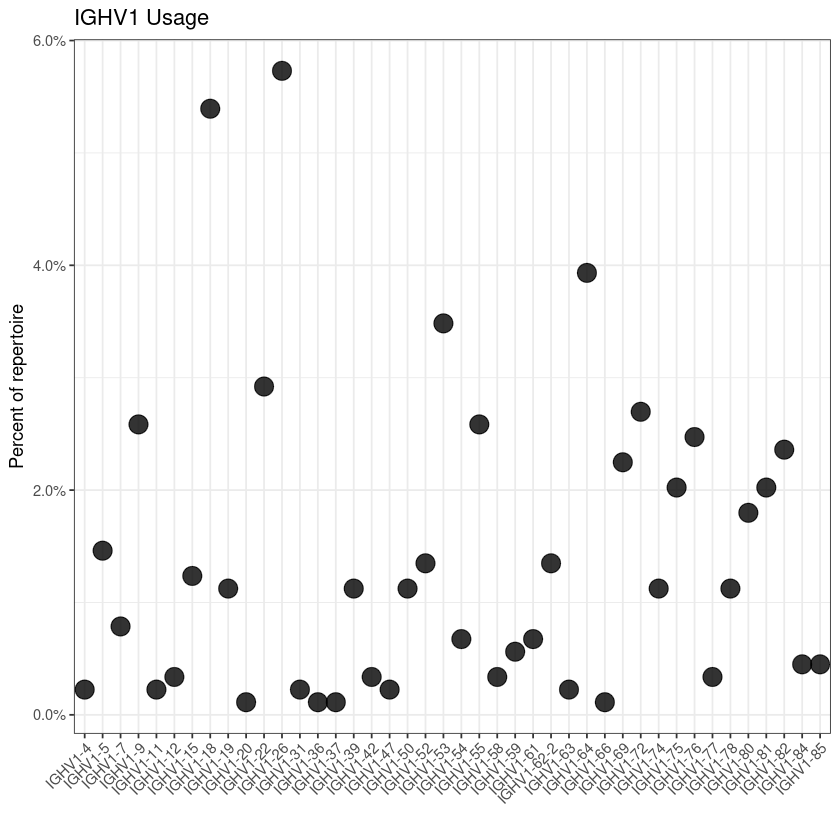

In [25]:
# Assign sorted levels and subset to IGHV1
ighv1 <- gene %>%
    mutate(gene=factor(gene, levels=sortGenes(unique(gene), method="name"))) %>%
    filter(getFamily(gene) == "IGHV1")

# Plot V gene usage in the IGHV1 family by sample
g1 <- ggplot(ighv1, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("IGHV1 Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_brewer(palette="Set1") +
    geom_point(aes(color=), size=5, alpha=0.8)
plot(g1)

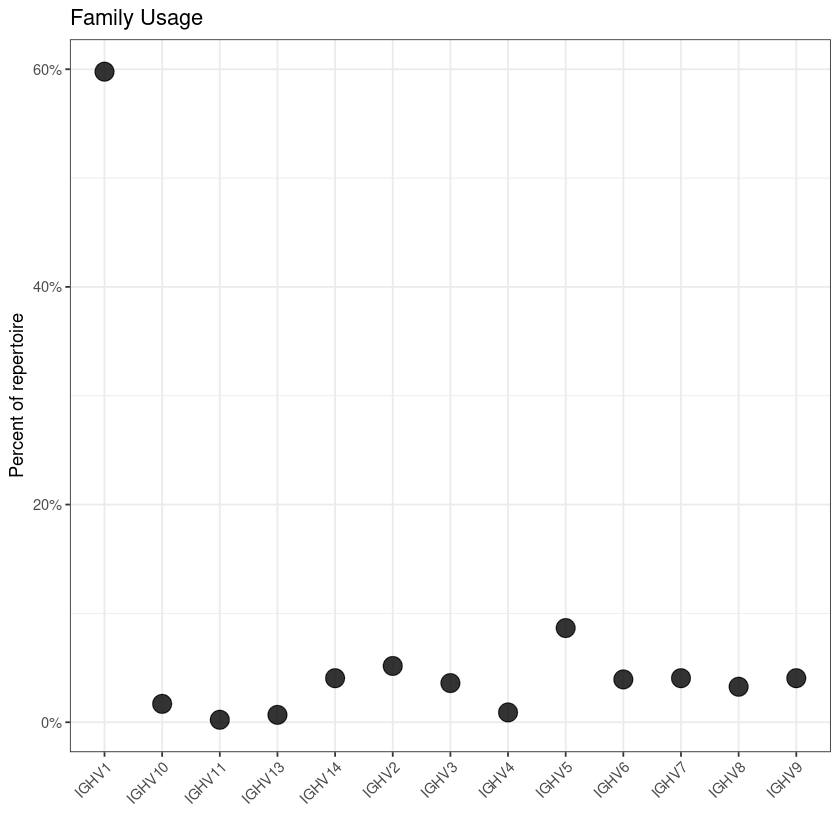

In [26]:
# Alternatively, quantify V gene based on the family.
family_v1 <- countGenes(db, gene="v_call", mode="family")

# Plot V family usage by sample
g2 <- ggplot(family_v1, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("Family Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_brewer(palette="Set1") +
    geom_point(size=5, alpha=0.8)
plot(g2)

In [27]:
# Grouping multiple columns to calculate abundance.
# Clonal criteria is added to display the most common allele/gene/family.

# Quantify V family clonal usage by sample and C isotype
family_v_c_group <- countGenes(db, gene="v_call", groups=c("c_call"), 
                     clone="clone_id", mode="family")
head(family_v_c_group, n=4)

c_call,gene,clone_count,clone_freq
<chr>,<chr>,<int>,<dbl>
IGHA,IGHV10,1,0.06666667
IGHA,IGHV14,1,0.06666667
IGHA,IGHV3,1,0.06666667
IGHA,IGHV9,1,0.06666667


In [28]:
# Summary

# 1. Without copy numbers
genes_clone_family <- countGenes(db, gene="v_call", mode="family")
genes_gene <- countGenes(db, gene="v_call", mode="gene")
genes_allele <- countGenes(db, gene="v_call", mode="allele")

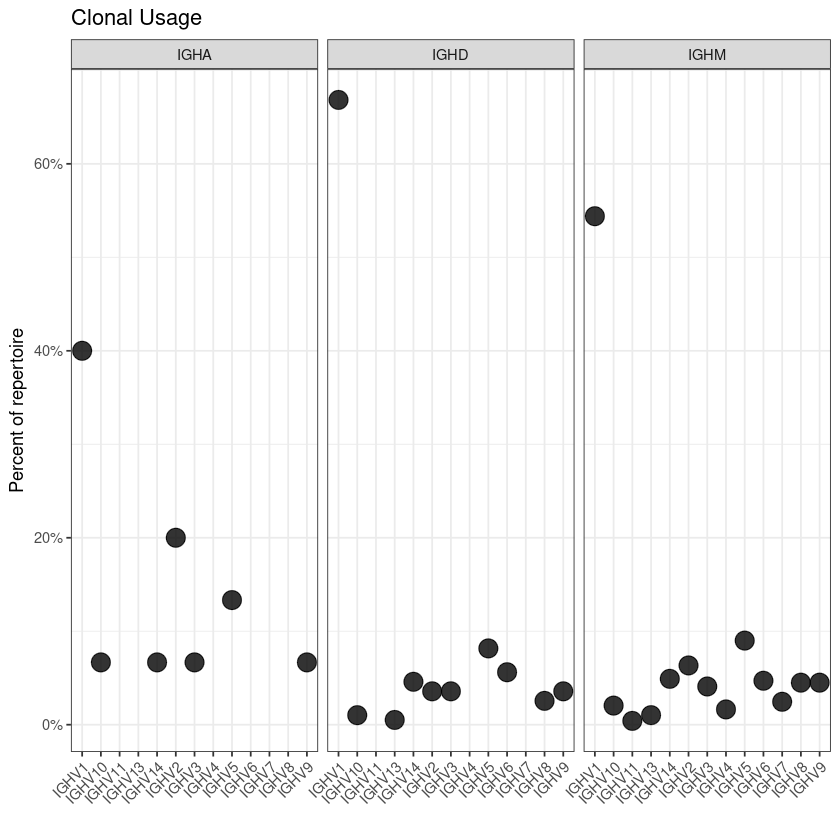

In [29]:
#2. With copy numbers based on clone
genes_clone_family <- countGenes(db, gene="v_call", groups = c("c_call"), clone = "clone_id", mode="family")

genes_clone_family <- filter(genes_clone_family, c_call %in% c("IGHM", "IGHG", "IGHD", "IGHA"))

g_clone_family <- ggplot(genes_clone_family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    ggtitle("Clonal Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_brewer(palette="Set1") +
    geom_point(size=5, alpha=0.8) +
    facet_grid(. ~ c_call)
plot(g_clone_family)